<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/MARCA-Color.jpg" title="Title text" width="50%" height="50%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales II-2018 </h1>

<H3 align='center'> Tarea 2 - Redes Convolucionales y sus aplicaciones </H3>
<hr style="height:2px;border:none"/>



**Temas**  
* Diseño y entrenamiento de Redes Neuronales Convolucionales (CNNs).
* Regularización en Redes Convolucionales.
* *Transfer Learning.*
* Aplicaciones de las Redes Neuronales Convolucionales

**Formalidades**  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* **Fecha de entrega y discusión: 23 de Noviembre**
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<margarita.bugueno.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<cvalle@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea2-INF395-II-2018] 

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Convolutional Neural Networks (CNN) en CIFAR.  
[2.](#segundo) Transfer Learning.   
[3.](#tercero) Convolutional Neural Network sobre texto.


### **Nota Importante:**  
Para esta actividad **si es que no se cuenta con GPU** se recomienda utilizar el entorno virtual de __[Colaboratory - Google](https://colab.research.google.com/)__* . Así, podrá programar en la nube con recursos elevados y luego descargar el Jupyter Notebook y entregarlo en modo Informe.


<a id="primero"></a>
## 1. Convolutional Neural Networks (CNN) en CIFAR 

En esta sección trabajaremos con un dataset bastante conocido y utilizado por la comunidad para experimentar reconocimiento de objetos en imágenes: CIFAR10 [3]. Se trata de un conjunto de 60.000 imágenes RGB de 32 × 32 pixeles que contiene 10 clases de objetos y 6000 ejemplos por clase. La versión utilizada se le atribuye a *A. Krizhevsky, V. Nair* y *G. Hinton* y viene separada en 50000 ejemplos de entrenamiento y 10000 casos de prueba que fueron obtenidos seleccionando 1000 imágenes aleatorias de cada clase.  
Los datos restantes han sido ordenados aleatoriamente y están organizados en 5 bloques de entrenamiento o batches. Cabe destacar que las clases son mutuamente excluyentes y corresponden a las siguientes categorı́as: 

* Gato
* Perro
* Rana
* Caballo
* Pájaro
* Ciervo
* Avión
* Automóvil
* Camión 
* Barco

Para esta tarea se experimentará con redes convolucionales, conocidas como CNNs ó ConvNets.  
**Nota:** Para esta actividad es bastante aconsejable entrenar las redes usando una GPU, ya que de otro modo los tiempos de entrenamiento serán largos. Recuerde instalar Keras con gpu y el driver de cuda para la tarjeta gráfica.  

> **a)** Construya una función que cargue todos los bloques de entrenamiento y pruebas del problema CIFAR generando como salida:  
(i) dos matrices  Xtr, Ytr; correspondientes a las imágenes y etiquetas de entrenamiento  
(ii) dos matrices Xt, Yt; correspondientes a las imágenes y etiquetas de pruebas  
(iii) dos matrices Xv, Yv; correspondientes a las imágenes y etiquetas que se usarán como conjunto de validación (para tomar decisiones de diseño acerca del modelo)  

> **Este último conjunto debe ser extraı́do desde el conjunto de entrenamiento original y no debe superar las 5000 imágenes.**

In [72]:
import math
import os

import cv2
from cv2 import xfeatures2d
from keras import activations
from keras import callbacks
from keras.datasets import cifar10
from keras import layers
from keras import losses
from keras import models
from keras import optimizers
from keras.preprocessing import image
from keras import utils
from matplotlib import pyplot
import numpy as np
import pandas as pd
from sklearn import model_selection

In [73]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(label_names)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [74]:
print('Total datos entrenamiento: ', len(x_train))
print('Total datos prueba: ', len(x_test))

Total datos entrenamiento:  50000
Total datos prueba:  10000


Forma datos de entrenamiento  (50000, 32, 32, 3)


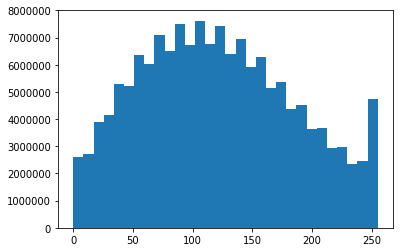

In [75]:
print('Forma datos de entrenamiento ', x_train.shape)
_ = pyplot.hist(x_train.flatten(), bins=30)

Vemos que los datos vienen como imágenes de $32 \times 32$, con 3 canales (RGB). Además, por el histograma de sus valores, vemos que se distribuyen en valores entre 0 y 255, teniendo más valores en el centro, y una acumulación en el 255. Separaremos el conjunto de entrenamiento, dejando un $10\%$ del total (5000 datos) como conjunto de validación.

In [76]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(x_train, y_train, test_size=0.1)
print('Total datos de entrenamiento: ', len(x_train))
print('Total datos de validación: ', len(x_val))
print('Total datos de prueba: ', len(x_test))

Total datos de entrenamiento:  45000
Total datos de validación:  5000
Total datos de prueba:  10000


> **b)** Prepare subconjuntos de entrenamiento, validación y pruebas normalizando las imágenes de entrenamiento y pruebas, dividiendo las intensidades originales de pixel en cada canal por 255.  Es importante notar que si desea trabajar con el orden de las dimensiones denominado ’tf’ (por defecto para TensorFlow) deberá realizar la transposición correspondiente para dejar el canal en donde corresponda. Finalmente, genere una representación adecuada de las salidas deseadas de la red.

In [77]:
# x_train = x_train.transpose([0, 3, 1, 2])  # only if 'tf' dim-ordering is to be used
# x_val = x_val.transpose([0, 3, 1, 2])  # only if 'tf' dim-ordering is to be used
# x_test = x_test.transpose([0, 3, 1, 2])  # remove if 'th' dim-ordering is to be used
x_train = x_train / 255.0 - 0.5  # Normalizado y centrado en 0 en vez de 0.5
x_val = x_val / 255.0 - 0.5  # Normalizado y centrado en 0 en vez de 0.5
x_test = x_test / 255.0 - 0.5  # Normalizado y centrado en 0 en vez de 0.5
y_train = utils.to_categorical(y_train, num_classes)
y_val = utils.to_categorical(y_val, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
print('Nueva forma de datos de entrenamiento: ', x_train.shape)

Nueva forma de datos de entrenamiento:  (45000, 32, 32, 3)


Notar que además de dividir los valores de los pixeles por $255$, restamos $0.5$, haciendo que un valor $0$ se convierta en $-0.5$ y un valor $255$ se convierta en $0.5$. Así habrá números positivos y negativos en la entrada, en vez de ser todos positivos.

> **c)** Defina una CNN con arquitectura $C \times P \times C \times P \times F \times F$. Para ambas capas convolucionales utilice 64 filtros de $3 \times 3$ y funciones de activación ReLU. Para las capas de pooling utilice filtros de $2 \times 2$ con stride 2. Para la capa MLP escondida use 512 neuronas. Genere un esquema lo más compacto posible que muestre los cambios de forma (dimensionalidad) que experimenta un patrón de entrada a medida que se ejecuta un forward-pass y el número de parámetros de cada capa.

Creamos función auxiliar para hacer la definición y entrenamiento de una red, de manera de no escribir tanto código:

In [89]:
def build_net(units,  # a list of number of units per layer
              filters_size=3,
              number_conv_per_layer=1,
              replace_maxpool_by_conv=False,
              dropout=-1.0):
    model = models.Sequential()
    for num, number_units in enumerate(units):
        if num < 1:
            model.add(layers.Conv2D(units[num], (filters_size, filters_size), padding='same',
                                    input_shape=x_train.shape[1:]))
        else:
            model.add(layers.Conv2D(units[num], (filters_size, filters_size), padding='same'))
        model.add(layers.Activation(activations.relu))
        if replace_maxpool_by_conv:
            model.add(layers.Conv2D(int(units[num] / 2),
                                    (filters_size, filters_size),
                                    strides=(2, 2), padding='same'))
        else:
            model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # default stride is pool_size
        if dropout > 0.0:
            model.add(layers.Dropout(dropout))
    model.add(layers.Flatten())
    model.add(layers.Dense(512))
    model.add(layers.Activation(activations.relu))
    model.add(layers.Dense(num_classes))
    model.add(layers.Activation(activations.softmax))
    return model

EPOCHS = 30  # Number of epochs to run all nets

def train_net(model, optimizer, epochs=EPOCHS, batch_size=32,
              step_decay=None):
    model.compile(optimizer=optimizer, loss=losses.categorical_crossentropy)
    my_callbacks = ([callbacks.LearningRateScheduler(step_decay)]
                    if step_decay is not None else None)
    return model.fit(x_train, y_train, batch_size=batch_size,
                     epochs=epochs, validation_data=(x_val, y_val),
                     shuffle=True, callbacks=my_callbacks)

In [79]:
model = build_net([64, 64])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_37 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_38 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 4096)              0         
__________

> **d)**  Entrene la CNN definida en **c)** utilizando SGD. En este dataset, una tasa de aprendizaje “segura” es $\eta = 10^{-4}$ o inferior, pero durante las primeras *epochs* el entrenamiento resulta demasiado lento. Para resolver el problema aprenderemos a controlar la tasa de aprendizaje utilizada en el entrenamiento. Implemente la siguiente idea: deseamos partir con una tasa de aprendizaje $\eta = 10^{-3}$ y dividir por 2 ese valor cada 10 epochs. Suponga además que no queremos usar una tasa de aprendizaje menor a $\eta = 10^{-5}$.  Construya un gráfico que muestre los errores de entrenamiento, validación y pruebas como función del número de “epochs”, entrene con 25 *epochs*.

In [80]:
def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1 + epoch) / 5))
    lrate = max(lrate, 0.00001)
    return lrate

opt = optimizers.SGD(lr=0.0001, momentum=0.9, decay=0.0)
history_sgd = train_net(model, opt, step_decay=step_decay)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 229s 5ms/step - loss: 1.8815 - val_loss: 1.6193
Epoch 2/30
45000/45000 [==============================] - 221s 5ms/step - loss: 1.4738 - val_loss: 1.4003
Epoch 3/30
45000/45000 [==============================] - 198s 4ms/step - loss: 1.3143 - val_loss: 1.2652
Epoch 4/30
45000/45000 [==============================] - 198s 4ms/step - loss: 1.2123 - val_loss: 1.2231
Epoch 5/30
45000/45000 [==============================] - 170s 4ms/step - loss: 1.1159 - val_loss: 1.1373
Epoch 6/30
45000/45000 [==============================] - 192s 4ms/step - loss: 1.0716 - val_loss: 1.0977
Epoch 7/30
45000/45000 [==============================] - 193s 4ms/step - loss: 1.0324 - val_loss: 1.0714
Epoch 8/30
45000/45000 [==============================] - 197s 4ms/step - loss: 0.9909 - val_loss: 1.0607
Epoch 9/30
45000/45000 [==============================] - 191s 4ms/step - loss: 0.9531 - val_loss: 1.03

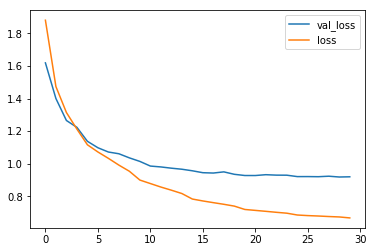

In [81]:
_ = pd.DataFrame(history_sgd.history).loc[:, ['val_loss', 'loss']].plot()

De manera de hacer más realista el experimento, utilizamos los errores de validación y entrenamiento, sin revisar el error de pruebas. La función de error utilizada es `categorical_crossentropy`, pues consiste en un problema de clasificación en múltiples clases, y la salida la estamos codificando como vectores one hot. Vemos que posteriormente a las $20$ epochs, el error de validación no parece descender mucho más, mientras que el de entrenamiento sigue bajando. Curiosamente, no sube el error de validación, por lo que no es un sobreajuste como tal.

> **e)** Entrene la CNN definida en c) utilizando **RMSProp** durante 25 *epochs*. Elija la función de pérdida más apropiada para este problema. Construya finalmente un gráfico que muestre los errores de entrenamiento, validación y pruebas como función del número de *epochs*.  
*Hint: La curva sugiere algún cambio en el modelo definido, considere ésto en cuenta para las experimentaciones futuras.*

In [82]:
model = build_net([64, 64])
opt = optimizers.rmsprop(lr=0.001, decay=1e-6)
history_rmsprop = train_net(model, opt)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 169s 4ms/step - loss: 1.2481 - val_loss: 1.0414
Epoch 2/30
45000/45000 [==============================] - 166s 4ms/step - loss: 0.8563 - val_loss: 0.9719
Epoch 3/30
45000/45000 [==============================] - 162s 4ms/step - loss: 0.6765 - val_loss: 0.9505
Epoch 4/30
45000/45000 [==============================] - 164s 4ms/step - loss: 0.5342 - val_loss: 0.8752
Epoch 5/30
45000/45000 [==============================] - 162s 4ms/step - loss: 0.4332 - val_loss: 0.9221
Epoch 6/30
45000/45000 [==============================] - 166s 4ms/step - loss: 0.3519 - val_loss: 1.0038
Epoch 7/30
45000/45000 [==============================] - 161s 4ms/step - loss: 0.2948 - val_loss: 1.3046
Epoch 8/30
45000/45000 [==============================] - 165s 4ms/step - loss: 0.2554 - val_loss: 1.4735
Epoch 9/30
45000/45000 [==============================] - 162s 4ms/step - loss: 0.2318 - val_loss: 1.29

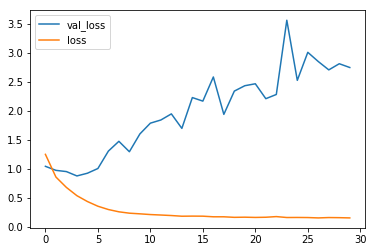

In [83]:
_ = pd.DataFrame(history_rmsprop.history).loc[:, ['val_loss', 'loss']].plot()

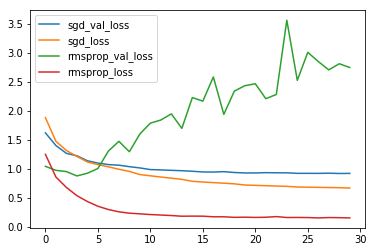

In [84]:
to_plot = pd.concat([pd.DataFrame(history_sgd.history), pd.DataFrame(history_rmsprop.history)], axis=1)
to_plot.columns = ['sgd_val_loss', 'sgd_loss', 'lr', 'rmsprop_val_loss', 'rmsprop_loss']
_ = to_plot.loc[:, ['sgd_val_loss', 'sgd_loss', 'rmsprop_val_loss', 'rmsprop_loss']].plot()

Como podemos ver, RMSprop reduce mucho más rápidamente el error en ambos conjuntos, por lo que el algoritmo SGD es más agresivo al inicio, incluso usando una tasa de aprendizaje pequeña. Sin embargo, RMSprop luego de algunos pocos epochs, comienza a sobreajusta, dejando el error de validación en valores muy altos, y reduciendo demasiado el error de los datos de entrenamiento. Esto significa que los pasos con gradiente "normalizado" de RMSprop no son una buena idea para este problema, y es mejor ir reduciendo la tasa de aprendizaje independientemente del valor del gradiente, como lo hacemos con SGD.

Debido a este resultado, usaremos SGD con step decay en el resto de esta pregunta.

> **f)** Evalúe el efecto de modificar el tamaño de los filtros (de convolución) reportando la sensibilidad del error de pruebas a estos cambios en dos tipos de arquitecturas, una profunda y otra no. Presente un gráfico o tabla resumen. Por simplicidad entre durante sólo 15-20 *epochs*.

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 174s 4ms/step - loss: 1.7974 - val_loss: 1.5875
Epoch 2/30
45000/45000 [==============================] - 220s 5ms/step - loss: 1.4682 - val_loss: 1.3730
Epoch 3/30
45000/45000 [==============================] - 213s 5ms/step - loss: 1.2989 - val_loss: 1.2855
Epoch 4/30
45000/45000 [==============================] - 226s 5ms/step - loss: 1.2004 - val_loss: 1.2199
Epoch 5/30
45000/45000 [==============================] - 217s 5ms/step - loss: 1.1146 - val_loss: 1.1684
Epoch 6/30
45000/45000 [==============================] - 173s 4ms/step - loss: 1.0760 - val_loss: 1.1321
Epoch 7/30
45000/45000 [==============================] - 201s 4ms/step - loss: 1.0424 - val_loss: 1.1323
Epoch 8/30
45000/45000 [==============================] - 209s 5ms/step - loss: 1.0104 - val_loss: 1.1059
Epoch 9/30
45000/45000 [==============================] - 203s 5ms/step - loss: 0.9814 - val_loss: 1.08

45000/45000 [==============================] - 372s 8ms/step - loss: 1.9254 - val_loss: 1.5761
Epoch 2/30
45000/45000 [==============================] - 390s 9ms/step - loss: 1.4819 - val_loss: 1.3740
Epoch 3/30
45000/45000 [==============================] - 380s 8ms/step - loss: 1.3053 - val_loss: 1.2328
Epoch 4/30
45000/45000 [==============================] - 378s 8ms/step - loss: 1.1722 - val_loss: 1.1213
Epoch 5/30
45000/45000 [==============================] - 401s 9ms/step - loss: 1.0479 - val_loss: 1.0623
Epoch 6/30
45000/45000 [==============================] - 418s 9ms/step - loss: 0.9976 - val_loss: 1.0319
Epoch 7/30
45000/45000 [==============================] - 372s 8ms/step - loss: 0.9524 - val_loss: 0.9734
Epoch 8/30
45000/45000 [==============================] - 379s 8ms/step - loss: 0.9057 - val_loss: 0.9655
Epoch 9/30
45000/45000 [==============================] - 371s 8ms/step - loss: 0.8676 - val_loss: 0.9421
Epoch 10/30
45000/45000 [==============================] 

Epoch 17/30
45000/45000 [==============================] - 752s 17ms/step - loss: 0.5454 - val_loss: 0.8651
Epoch 18/30
45000/45000 [==============================] - 784s 17ms/step - loss: 0.5333 - val_loss: 0.8678
Epoch 19/30
45000/45000 [==============================] - 764s 17ms/step - loss: 0.5198 - val_loss: 0.8657
Epoch 20/30
45000/45000 [==============================] - 749s 17ms/step - loss: 0.4965 - val_loss: 0.8641
Epoch 21/30
45000/45000 [==============================] - 756s 17ms/step - loss: 0.4887 - val_loss: 0.8642
Epoch 22/30
45000/45000 [==============================] - 769s 17ms/step - loss: 0.4819 - val_loss: 0.8674
Epoch 23/30
45000/45000 [==============================] - 794s 18ms/step - loss: 0.4755 - val_loss: 0.8691
Epoch 24/30
45000/45000 [==============================] - 747s 17ms/step - loss: 0.4688 - val_loss: 0.8703
Epoch 25/30
45000/45000 [==============================] - 773s 17ms/step - loss: 0.4559 - val_loss: 0.8649
Epoch 26/30
45000/45000 [===

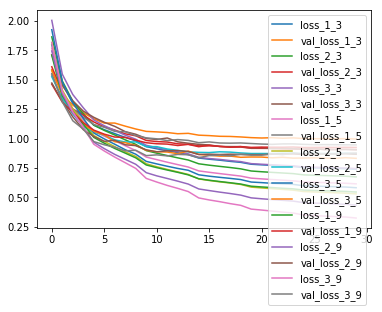

In [86]:
opt = optimizers.SGD(lr=0.0001, momentum=0.9, decay=0.0)
all_losses_f = {}
for filters_size in [3, 5, 9]:
    for num_conv_layers in [1, 2, 3]:
        model = build_net([64] * num_conv_layers, filters_size=filters_size)
        history = train_net(model, opt, step_decay=step_decay)
        all_losses_f['loss_{}_{}'.format(num_conv_layers, filters_size)] = history.history['loss']
        all_losses_f['val_loss_{}_{}'.format(num_conv_layers, filters_size)] = history.history['val_loss']

In [ ]:
_ = pd.DataFrame(all_losses_f).plot()

Vemos que en la mayoría de las redes comienza a sobreajustarse luego de algunos pocos epochs.

> **g)** Se ha sugerido que la práctica bastante habitual de continuar una capa convolucional con una capa de *pooling* puede generar una reducción prematura de las dimensiones del patrón de entrada. Experimente con una arquitectura del tipo $C \times P \times C \times P \times F \times F$ versus  $C \times C \times P \times C \times C \times P \times F \times F$. Use 64 filtros para la primera capa convolucional y 128 para la segunda (o 64 filtros para las primeras 2 capas convolucionales y 128 para las dos últimas).  

> Reflexione sobre qué le parece más sensato: ¿qué estructura permite un mejor desempeño y/o extracción de atributos de interés?¿es aconsejable mantener el tamaño de los filtros usados anteriormente (pregunta anterior)? o ¿usar filtros más grandes en la segunda capa convolucional y más pequeños en la primera? o ¿usar filtros más pequeños en la segunda capa convolucional y más grandes en la primera?  
> **Hint:** con esta nueva arquitectura debiese superar el 70% de accuracy (de validación/test) antes de 5 epochs, pero la arquitectura es más sensible a overfitting por lo que podrı́a ser conveniente agregar un regularizador. Como resultado final de esta actividad gráfique los errores de entrenamiento, validación y pruebas como función del número de “epochs” (fijando el máximo en un número razonable como T = 25).

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 235s 5ms/step - loss: 1.8690 - val_loss: 1.6038
Epoch 2/30
45000/45000 [==============================] - 255s 6ms/step - loss: 1.4551 - val_loss: 1.3547
Epoch 3/30
45000/45000 [==============================] - 260s 6ms/step - loss: 1.2841 - val_loss: 1.2271
Epoch 4/30
45000/45000 [==============================] - 219s 5ms/step - loss: 1.1809 - val_loss: 1.1793
Epoch 5/30
45000/45000 [==============================] - 234s 5ms/step - loss: 1.0834 - val_loss: 1.0992
Epoch 6/30
45000/45000 [==============================] - 257s 6ms/step - loss: 1.0367 - val_loss: 1.0758
Epoch 7/30
45000/45000 [==============================] - 267s 6ms/step - loss: 0.9968 - val_loss: 1.0215
Epoch 8/30
45000/45000 [==============================] - 295s 7ms/step - loss: 0.9551 - val_loss: 1.0243
Epoch 9/30
45000/45000 [==============================] - 274s 6ms/step - loss: 0.9197 - val_loss: 0.97

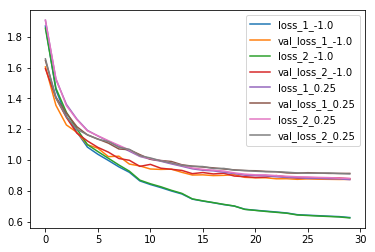

In [87]:
all_losses_g = {}
for dropout in [-1.0, 0.25]:
    for number_conv_per_layer in [1, 2]:
        model = build_net([64, 128], number_conv_per_layer=number_conv_per_layer, dropout=dropout)
        history = train_net(model, opt, step_decay=step_decay)
        all_losses_g['loss_{}_{}'.format(number_conv_per_layer, dropout)] = history.history['loss']
        all_losses_g['val_loss_{}_{}'.format(number_conv_per_layer, dropout)] = history.history['val_loss']

In [ ]:
_ = pd.DataFrame(all_losses_g).plot()

Vemos que no usar dropout hace que el error de validación baje más rápido, y las con dropout logran un error muy similar, no necesariamente mejor en el largo plazo.

> **h)** Algunos investigadores, han propuesto que las capas de *pooling* se pueden reemplazar por capas convoluciones con stride 2. ¿Se reduce dimensionalidad de este modo? Compruébelo verificando los cambios de forma (dimensionalidad) que experimenta un patrón de entrada a medida que se ejecuta un *forward-pass*.  
Entrene la red resultante con el método que prefiera, gráficando los errores de entrenamiento, validación y pruebas como función del número de “epochs” (fijando el máximo en un número razonable como T = 25).

In [91]:
all_losses_h = {}
for replace_maxpool_by_conv in [False, True]:
    model = build_net([64, 128], replace_maxpool_by_conv=replace_maxpool_by_conv)
    history = train_net(model, opt, step_decay=step_decay)
    all_losses_h['loss_{}'.format(replace_maxpool_by_conv)] = history.history['loss']
    all_losses_h['val_loss_{}'.format(replace_maxpool_by_conv)] = history.history['val_loss']

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 247s 5ms/step - loss: 1.8815 - val_loss: 1.6047
Epoch 2/30
45000/45000 [==============================] - 241s 5ms/step - loss: 1.4819 - val_loss: 1.4067
Epoch 3/30
45000/45000 [==============================] - 249s 6ms/step - loss: 1.3076 - val_loss: 1.2605
Epoch 4/30
45000/45000 [==============================] - 255s 6ms/step - loss: 1.2059 - val_loss: 1.1896
Epoch 5/30
45000/45000 [==============================] - 243s 5ms/step - loss: 1.1088 - val_loss: 1.1320
Epoch 6/30
45000/45000 [==============================] - 258s 6ms/step - loss: 1.0625 - val_loss: 1.1077
Epoch 7/30
45000/45000 [==============================] - 266s 6ms/step - loss: 1.0206 - val_loss: 1.0633
Epoch 8/30
45000/45000 [==============================] - 285s 6ms/step - loss: 0.9803 - val_loss: 1.0576
Epoch 9/30
45000/45000 [==============================] - 272s 6ms/step - loss: 0.9404 - val_loss: 1.00

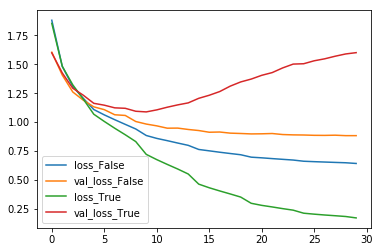

In [92]:
_ = pd.DataFrame(all_losses_h).plot()

Vemos que substituir la capa de maxpool por convoluciones de $2 \times 2$ resulta en un sobreajuste mayor. Esto puede deberse a que la red tiene más pesos en la convolución, y estos se adaptan para el conjunto de entrenamiento.

> **i)** Una forma interesante de regularizar modelos entrenados para visión artificial consiste en “aumentar” el número de ejemplos de entrenamiento usando transformaciones sencillas como: rotaciones, corrimientos y reflexiones, tanto horizontales como verticales. Explique por qué este procedimiento podrı́a ayudar a mejorar el modelo y el por qué las etiquetas no cambian al aplicar estas operaciones. Evalúe experimentalmente la conveniencia de incorporarlo.

In [ ]:
datagen = image.ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images
datagen.fit(x_train)
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=(x_train.shape[0] // batch_size),
                    epochs=epochs, validation_data=(x_test, y_test))

> **j)** Para una comparación del desempeño de la red neuronal, pre-procese el dataset de CIFAR-10 y calcule los descriptores manuales SIFT, para un mejor entendimiento de éstos consulte:  https://ianlondon.github.io/blog/how-to-sift-opencv/ y https://docs.opencv.org/3.4.3/da/df5/tutorial_py_sift_intro.html. Como se genera un descriptor de 128 dimensiones para cada *keypoint* comprima esta información de alguna manera, comente sobre la operación.

> Es necesario instalar *OpenCV* para realizar el cálculo de este descriptor.  
```python
!pip install opencv-python==3.1 opencv-contrib-python==3.4.2.16
```
*Recuerde escalar los datos antes de entregárselos al modelo*

In [ ]:
def pre_process(img):
    if np.max(img) <= 1:
        img *= 255
    img = img.astype('uint8')
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def calculate_sift(cifar):
    sift_cifar = []
    for image in cifar:
        img_gray = pre_process(image)
        sift = xfeatures2d.SIFT_create()
        kp, desc = sift.detectAndCompute(img_gray, None)
        if desc is None:
            desc = np.zeros((1,128))
        compress_desc = np.mean(desc,axis=0)  # compress all keypoints
        sift_cifar.append(compress_desc)
    return np.asarray(sift_cifar)

cifar_sift = calculate_sift(X)

> **j.1)** Visualice los *keypoint* para una mejor comprensión visual de lo que son los descriptores manuales en alguna imagen aleatoria.

> Entrene una red neuronal densa (la misma que sigue a las capas convoluciones definidas en los modelos previos), compare el desempeño de la red con el modelo más básico (o de peor desempeño) y el modelo de mejor desempeño obtenido hasta este punto. Comente sobre el entrenamiento (error y tiempos de ejecución) y resultados.

In [ ]:
sample_image = X[sample_index]
gray_sample_image = pre_process(sample_image)
sift = xfeatures2d.SIFT_create()
kp = sift.detect(gray_sample_image, None)

img = cv2.drawKeypoints(gray_sample_image, kp, sample_image)
pyplot.imshow(img)
pyplot.show()

> **k)** Elija una de las redes entrenadas en esta sección (preferentemente una con buen desempeño) y determine los pares de objetos (por ejemplo “camiones” con “autos”) que la red tiende a confundir. Conjeture el motivo de tal confusión.

> **l)** Elija una de las redes entrenadas (preferentemente una con buen desempeño) y visualice los pesos correspondientes a los filtros de la primera capa convolucional. Visualice además el efecto del filtro sobre algunas imágenes de entrenamiento. Repita el proceso para los pesos de la última capa convolucional; Comente y compare con los descriptores SIFT.

<a id="tercero"></a>
## 2. *Transfer Learning*

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/05/31130754/transfer-learning.jpeg" , style="float: right;" />

En esta sección se trabajará con el dataset trabajado anteriormente, CIFAR [3], pero en su versión más fina, en el cual se presentan 100 tipos distintos de categorías a clasificar la imagen (mutuamente excluyente), no 10 como se usó en las actividades anteriores. La estructura es la misma, son 60000 imágenes RGB de 32 $\times$ 32 píxeles separados en 50 mil de entrenamiento y 10 mil de pruebas.  
Aquí se experimentará con el concepto de *transfer learning* el cual consta en transferir conocimiento de un dominio fuente (*source domain*) a un dominio objetivo (*target domain*). En redes neuronales existen muchas representaciones de esto, en común consta en pre inicializar los pesos de la red de alguna manera que no sea con distribuciones de manera aleatoria (*fine tunning*). También está lo que es utilizar una representación generada a través de otra red entrenada con muchos datos, esto es tomar la red y "*congelar*" sus primeras capas para tomar esta representación y no entrenar esos pesos, lo que realizaremos en esta sección. 

Para cargar los datos utilice el siguiente comando:

In [ ]:
from keras import activations
from keras import applications
from keras.applications import vgg16
from keras.datasets import cifar100
from keras import layers
from keras import losses
from keras import models
from keras import optimizers

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Normalice entre [0,1] y transforme las etiquetas en *one hot vectors*.

In [ ]:
num_classes = 100
y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=num_classes)
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

> a) Entrene una red neuronal convolucional como se presenta en el código a continuación durante 15 *epochs*, realizando un gráfico de evolución de la función de pérdida y de la exactitud del algoritmo (*accuracy*) sobre ambos conjuntos, entrenamiento y pruebas. Comente sobre el tiempo de ejecución de este entrenamiento. Reporte el *accuracy* del modelo final sobre el conjunto de pruebas.

<div class="alert alert-block alert-info">Se utiliza una tasa de aprendizaje pequeña ya que es lo recomendable en *transfer learning*.</div>

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=x_train_norm.shape[1:], activation=activations.relu))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation=activations.relu))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation=activations.relu))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation=activations.relu))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation=activations.relu))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation=activations.softmax))
model.summary()

In [ ]:
optimizer_ = optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss=losses.categorical_crossentropy, optimizer=optimizer_, metrics=['accuracy'])
model.fit(x_train_norm, y_train, batch_size=128, epochs=15, verbose=1,
          validation_data=(x_test_norm, y_test))  # train it

> b) Debido al comportamiento de las curvas de entrenamiento, claramente se ve que se necesita un regularizador. Experimente utilizando Dropout con una tasa de 0.25 en las tandas convolucionales, elija donde situarlo, luego de la primera convolución, después de la segunda, solamente después del *pooling*, en todas o alguna forma que le parezca conveniente, de argumentos de ello. La idea es que se forme una idea de dónde conviene colocar el regularizador y porqué.

> c) Una forma de hacer lo que se conoce como *transfer learning* es utilizar el conocimiento (los parámetros) aprendido por una red entrenada con millones de imágenes, y tomar estos parámetros como los pre entrenados. Para esto se utilizará el modelo VGG16 [7] proporcionado a través de la interfaz de *keras*. Visualice el modelo y sus 23 capas. Para esta instancia se utilizará todo lo aprendido por las capas convolucionales, es decir, se eliminan las capas densas del modelo y se agregan unas nuevas a ser entrenadas desde cero.  
*Recuerde normalizar los datos de la manera en que fue entrenado VGG* ¿Cuál es éste proceso?

In [ ]:
x_train_vgg = vgg16.preprocess_input(x_train)
x_test_vgg = vgg16.preprocess_input(x_test)
input_tensor = Input(shape=x_train_vgg.shape[1:])
modelVGG = applications.VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)  # LOAD PRETRAINED MODEL 
features_train = modelVGG.predict(x_train_vgg)
features_test = modelVGG.predict(x_test_vgg)
modelVGG.summary()

> d) Entrene esta red agregando una capa densa de 1024 neuronas seguido de un dropout de 0.5, finalmente es necesario agregar la capa de clasificación para las 100 clases. Utilice la misma configuración del optimizador para que las comparaciones sean válidas. Entrene unicamente por 10 *epochs* y grafique las curvas de entrenamiento con respecto al modelo definido en a) o con regularización definido en b) ¿Qué sucede? Comente.

In [ ]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=features_train.shape[1:]))
model.add(layers.Dense(1024, activation=activations.relu))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation=activations.softmax))
model.compile(optimizer=optimizer_, loss=losses.categorical_crossentropy, metrics=['accuracy'])
model.fit(features_train, y_train, epochs=epochs_, batch_size=128,
          verbose=1, validation_data=(features_test, y_test))

> e) Agregue una capa de normalización (*Batch Normalization* [8]) de las activaciones en las capas densas, esto es, restar por la media del batch y dividir por la desviación estándar. Vuelva a entrenar el modelo con la misma configuración pero ahora por **15 *epochs***. Comente lo observado y compare las curvas de convergencia con los modelos anteriores ¿Por qué esto mejora a lo presentado en e)? Realice los mismos gráficos que en a) a través del número de *epochs* y comente sobre el tiempo de ejecución de este entrenamiento.

In [ ]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=features_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation=activations.relu))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation=activations.softmax))

> f) Finalmente experimente con utilizar toda la red pre-entrenada, eliminando la capa de clasificación de mil neuronas de VGG reemplazandola por la capa de clasificación para su modelo (o con alguna capa extra si estima conveniente), dejando "congelada" toda la red para atrás, ésto quiere decir que utilizará la representación generada por la última capa (no de clasificación) de la red VGG, ésto es las capas densas, no la convolucional como en la parte c). Grafique las curvas de entrenamiento (función de pérdida/*loss*) , comparando con b) y e).

In [ ]:
input_tensor = Input(shape=x_train_vgg.shape[1:])
modelVGG = applications.VGG16(weights='imagenet', include_top=True, input_tensor=input_tensor)  # LOAD PRETRAINED MODEL 
modelVGG.layers.pop()  # delete last softmax layer
modelVGG.summary()
features_train = modelVGG.predict(x_train_vgg)
features_test = modelVGG.predict(x_test_vgg)

model = models.Sequential()
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation=activations.softmax))

model.compile(optimizer=optimizer_, loss=losses.categorical_crossentropy, metrics=['accuracy'])
model.fit(features_train, y_train, epochs=15, batch_size=128,
          verbose=1, validation_data=(features_test, y_test))

> g) ¿Cuándo podría ser útil y cuando no utilizar *transfer learning* o una red pre-entrenada?

<a id="cuarto"></a>
## 3. CNN sobre texto

Cuando oimos sobre redes neuronales convolucionales (CNN) normalmente pensamos en visión artificial. Las CNN fueron responsables de los principales avances en la clasificación de imágenes y son el núcleo de la mayoría de los sistemas de *Computer Vision* en la actualidad, desde el etiquetado automático de fotos de Facebook hasta los autos que conducen por sí mismos.

Más recientemente, también hemos empezado a aplicar CNN a problemas de procesamiento del lenguaje natural (NLP) y hemos obtenido resultados interesantes. Como sabemos, las redes convolucionales tienen importantes ventajas como invarianza a rotaciones y traslaciones así como la conectividad local (características de nivel inferior en una representación de nivel superior), además de lo que las hace fuertemente ventajosas, el **compartir** parámetros.

**¿Cómo se aplica esto a NLP?**  
En esta experimentación apicaremos una red CNN al dataset  __[Adzuna](https://www.kaggle.com/c/job-salary-prediction)__ que contiene cientos de miles de registros que en su mayoría corresponden a texto no estructurado versus sólo unos pocos estructurados. Los registros pueden estar en varios formatos diferentes debido a los cientos de diferentes fuentes de registros, los cuales corresponden a anuncios de empleadores en busca de trabajadores.  
Es decir, cada fila es un anuncio que, en estricto rigor, representa una sentencia típicamente trabajada como vectores de word embeddings como **word2vec** o **GloVe**. Así, para una frase de 10 palabras bajo representaciones de *embeddings* utilizando 100 dimensiones tendríamos una matriz de 10 × 100 como entrada, lo que simularía nuestra "imagen".

Su tarea es entonces, predecir el salario (valor continuo) de un determinado anuncio en base al texto indicado en éste. Igualmente puede valerse de otros atributos del anuncio como por ejemplo la ubicación, tipo de contrato, etc. 

A continuación se presenta un código de guía para leer los archivos y pre-procesarlos. Deberá añadir y realizar lo que estime conveniente.

In [ ]:
import re
import os
import sys

from keras import activations
from keras import layers
from keras import losses
from keras import optimizers
from keras.preprocessing import sequence
from matplotlib import pyplot
import nltk
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
from sklearn import metrics

In [ ]:
stoplist = stopwords.words('english')
# lemmatizer (nltk.WordNetLemmatizer())
# stemming?

df_train = pd.read_csv('adzuna/Train_rev1.csv')
df_train.head()

def pre_process(df):
    # preprocesar texto de los anuncios
    # Eliminación de stopwords, stemming/lemmatization, puntuación, etc
    for s in textos:
        s = s.lower()
        s = re.sub(r'[^\w]', ' ', s)
        s = re.sub(r'\b[a-z]\b', ' ', s)
        s = re.sub(r'\b[a-z][a-z]\b', ' ', s)
        s = re.sub(r'\b[0-9]\b', ' ', s)
        s = re.sub(r'\b[0-9][0-9]\b', ' ', s)
        s = re.sub(r'\b[0-9][0-9][0-9]\b', ' ', s)
        s = re.sub(r'[^\w.]', ' ', s)
        s = list(s.split())
        # s = eliminación de stopwords
        # s = stemming o lemmatization
        # guardar texto procesado
    return df_procesado

df_train = pre_process(df_train)
df_val = pre_process(pd.read_csv('adzuna/Valid_rev1.csv'))
df_test = pre_process(pd.read_csv('adzuna/Test_rev1.csv'))

In [ ]:
y_dataframe = df_train['SalaryNormalized'].values
x_dataframe = df_train[['FullDescription', ...]]

k = len(df_procesado)
x_train = df_procesado[0:int(k * 0.70)]  # 70% training
x_val = df_procesado[int(k * 0.70):int(k * 0.85)]  # 15% validation
x_test = df_procesado[int(k * 0.85):]  # 15% test

### Embeddings 

En lugar de entrenar nuestros vectores embeddings utilizaremos el archivo __[Glove](https://www.kaggle.com/terenceliu4444/glove6b100dtxt#glove.6B.100d.txt)__ el cual cuenta con las representaciones vectoriales (de dimensionalidad 100) ya entrenadas sobre una amplia base de datos. Puede encontrar más detalle en https://nlp.stanford.edu/projects/glove/

In [ ]:
# armar diccionario word, index para posterior construccion de matriz de embeddings de glove
word_index = dict()
j = 0
for frase in x_train:
    seq = frase.split()
    for term in seq:
        if term not in word_index.keys():
            word_index[term] = j
            j += 1

embeddings_index = {}
f = open(os.path.join('glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Se encontraron %s terminos con sus vectores de embedding.' % len(embeddings_index))

embedding_vector = 100
embedding_matrix = np.zeros((len(word_index.keys()), embedding_vector))  # puede probar otra inicialización

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words sin match en Glove, serán vectores de ceros.
        embedding_matrix[i] = embedding_vector

### Modelo

In [ ]:
x_new_train = [[word_index[word] for word in text.split()] for text in x_train]
x_new_val = [[word_index[word] for word in text.split() if word in word_index] for text in x_val]

max_input_lenght = 150  # modificar este valor en base a su experimentación
Xtrain = sequence.pad_sequences(x_new_train, maxlen=max_input_lenght, padding='post', value=0)
Xval = sequence.pad_sequences(x_new_val, maxlen=max_input_lenght, padding='post', value=0)

embedding_vector = 100
embedding_layer = layers.Embedding(input_dim=len(word_index.keys()),
                                   output_dim=embedding_vector,
                                   weights=[embedding_matrix],
                                   input_length=max_input_lenght,
                                   trainable=False)

sequence_input = layers.Input(shape=(max_input_lenght,))
embedded_sequences = embedding_layer(sequence_input)
cov1 = layers.Conv1D(128, 5, activation=activations.relu, padding='same')(embedded_sequences)
pool = layers.MaxPooling1D(pool_size=)(cov1)
...
flat = layers.Flatten()(layerK)
preds = layers.Dense(1, activation=activations.linear)(flat)
model = models.Model(sequence_input, preds)
model.summary()

model.compile(loss=losses.mean_squared_error, optimizer=optimizers.rmsprop, metrics=['acc'])
model.fit(Xtrain, y_train, validation_data=(Xval, y_val), epochs=25, batch_size=256)

### Evaluación de predicciones
Para las predicciones evalúe la métrica *Mean Absolute Error* (MAE)

> **Intente resolver el problema experimentando con las ayudas que se entregan en el código y lo aprendido hasta ahora en el curso. Se espera que llegue a un MAE menor a 7000 en el conjunto de pruebas. No olvide documentar todo lo experimentando en este Informe Jupyter así como el argumento de sus decisiones.**

In [ ]:
print("MAE on train: ", metrics.mean_absolute_error(y_train, model.predict(Xtrain)))
print("MAE on validation: ", metrics.mean_absolute_error(y_val, model.predict(Xval)))